# 1. Cross Recurrence Plot


 - **Time series**

The *time series* ($S$) is a set of observations. It can be defined as

$$S = \left\lbrace s_{1}, s_{2}, \cdots, s_{M} \right\rbrace,$$ 

where $s_{i}$ is the observation recorded at time $i = \Delta t$ (where $\Delta t$ is the sampling time) and $M$ is the number of observations.

<br>

 - **Phase space trajectory**

The phase space trajectory can be reconstructed from a time series $S$ using *time delay embedding method* [1]

$$ \vec{x}_{i} = \left( s_{i}, s_{i+\tau}, s_{i+2\tau}, \cdots, s_{i+(m-1)\tau} \right), $$

where $m$ is an embedding dimension and $\tau$ is a time delay. Usually, the embedding dimensiom and the time delay can be estimated from the time series $S$ using false nearest neighbor algorithm [2,3] and mutual information function [4].

 - **Distance matrix**


The distance matrix ($D$) stores the distance between pairs of states. It can be mathematically expressed as

$$D_{i,j}^{m} = \left \| \vec{x}_{i}-\vec{y}_{j} \right \|, \;\; \vec{x}_{i}, \vec{y}_{j} \in \mathbb{R}^{m} \;\; i, j = \left\lbrace 1, 2, \cdots, N \right\rbrace,$$

where $N = M - (m - 1) \tau$ is the number of considered states $\vec{x}$ and $\vec{y}$, $m$ is an embedding dimension, $\tau$ is a time delay and $\left \| \cdot \right \|$ is a norm. 

 - **Cross recurrence matrix**

A recurrence is defined when the distance between two states $\vec{x}_{i}$ and $\vec{y}_{j}$  is smaller than a threshold $\rho$. Thus, the cross recurrence matrix (*CR*) is defined by [5]

$$CR_{i,j}^{m,\rho} = \theta \left( \left \| \vec{x}_{i}-\vec{y}_{j} \right \| - \rho \right), \;\; \vec{x}_{i} \in \mathbb{R}^{m}, \;\; i, j = \left\lbrace 1, 2, \cdots, N \right\rbrace,$$

where $N = M - (m - 1) \tau$ is the number of considered states $\vec{x}$, $m$ is an embedding dimension, $\tau$ is a time delay, $\rho$ is a threshold distance, $\left \| \cdot \right \|$ is a norm and $\theta \left( \cdot \right)$ is the Heaviside function that guarantees

$$ CR_{i,j}^{m,\rho} = \begin{cases}
1, & \text{ if the distance between } \vec{x}_{i} \text{ and } \vec{y}_{j} \text{ is smaller than } \rho \\ 
0, & \text{ otherwise }
\end{cases} . $$

 - **Cross recurrence plot**

The Cross Recurrence Plot (CRP) [5] is an advanced technique of nonlinear data analysis which reveals all the times when trajectory of the first system visits roughly the same area in the phase space where the trajectory of the second system is. It is the visualization of a cross recurrence matrix. If $CR_{i,j}^{m,\tau} = 1$, a black dot is placed at position $(i,j)$ of the graph. If $CR_{i,j}^{m,\tau} = 0$, a white dot is marked at position $(i,j)$ of the plot. 

## 1.1 Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import locale
import cross_recurrence as crp

In [2]:
# For Brazil
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')
mpl.rcParams['axes.formatter.use_locale'] = True

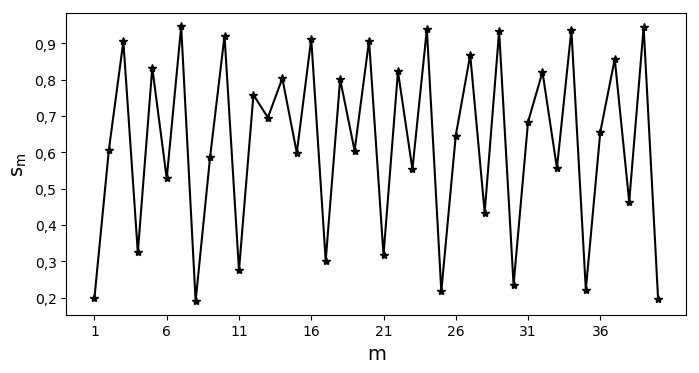

In [3]:
# Creating and plotting the time series #1
data1 = [0.2, 0.608, 0.9056768, 0.32462007, 0.83311914, 0.52832022, 0.94695227, 0.19088795, 0.58690901, 0.92129793, 
         0.2755306, 0.75853125, 0.69601406, 0.80399826, 0.59882321, 0.91288909, 0.30218586, 0.80130435, 0.60501961, 
         0.90808935, 0.31715971, 0.82296382, 0.55363861, 0.93906702, 0.21743658, 0.64660007, 0.868332, 0.43445986, 
         0.93367706, 0.23531199, 0.68377297, 0.82166448, 0.55682146, 0.93773102, 0.2218879, 0.65608392, 0.85742368, 
         0.46454358, 0.9452228, 0.1967513]

plt.figure(num= None, figsize=((8,4)), dpi=100)
plt.plot([x for x in range(1, len(data1)+1)], data1, '-*k')
plt.xlabel('m', fontsize=14)
plt.ylabel(r'$\mathrm{s_{m}}$', fontsize = 14)
plt.xticks([x for x in range(1, len(data1)+1, 5)], [x for x in range(1, len(data1)+1, 5)])
plt.show()

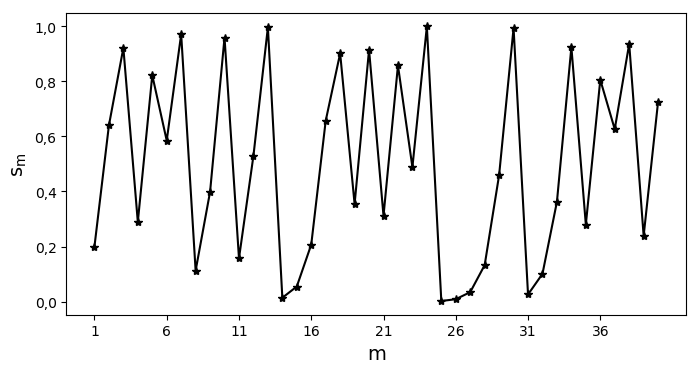

In [4]:
# Creating and plotting the time series #2
data2 = [0.20001, 0.640024, 0.92157312, 0.28910442, 0.82209222, 0.5850264, 0.97108205, 0.11232682, 0.39883801, 
         0.95906501, 0.15703728, 0.52950629, 0.99651751, 0.01388143, 0.05475495, 0.20702737, 0.65666815, 0.90182036, 
         0.35416159, 0.91492463, 0.3113502, 0.85764502, 0.48836017, 0.99945806, 0.0021666, 0.0086476, 0.03429129, 
         0.13246159, 0.45966208, 0.99349141, 0.02586492, 0.10078369, 0.36250535, 0.92438088, 0.27960346, 0.80570146, 
         0.62618647, 0.9363079, 0.23854168, 0.72655818]

plt.figure(num= None, figsize=((8,4)), dpi=100)
plt.plot([x for x in range(1, len(data2)+1)], data2, '-*k')
plt.xlabel('m', fontsize=14)
plt.ylabel(r'$\mathrm{s_{m}}$', fontsize = 14)
plt.xticks([x for x in range(1, len(data2)+1, 5)], [x for x in range(1, len(data2)+1, 5)])
plt.show()

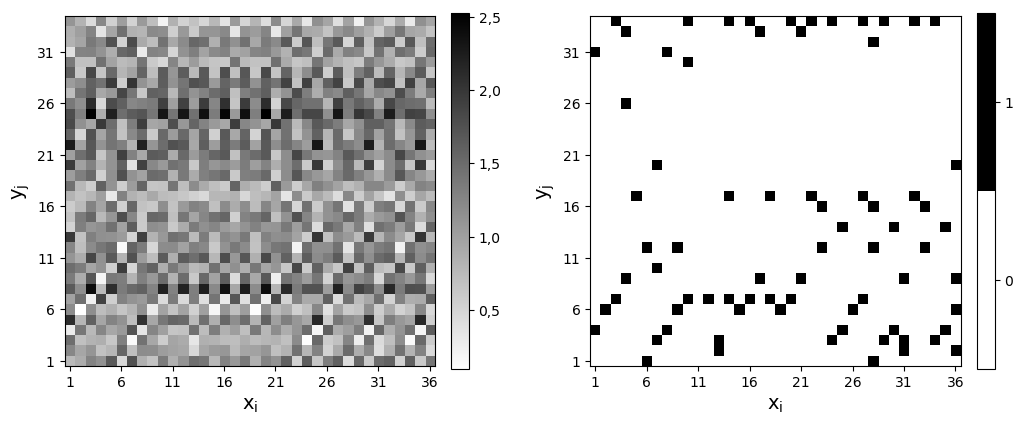

In [5]:
# Creating and plotting distance matrix and cross recurrence plot using Manhattan distance
dimension, delay1, delay2, threshold, norm = 3, 2, 3, 0.5, "manhattan"
distance_matrix = crp.distance_matrix(data1, data2, dimension, delay1, delay2, norm)
cross_matrix = crp.cross_matrix(data1, data2, dimension, delay1, delay2, threshold, norm)
distance_matrix = np.transpose(distance_matrix)
cross_matrix = np.transpose(cross_matrix)
LIN = len(distance_matrix[:,0])
COL = len(distance_matrix[0])

plt.figure(num=None, figsize=((12,6)), dpi= 100)
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1,2,1)
plt.imshow(distance_matrix, cmap = 'binary')
plt.axis([-0.5, COL-0.5, -0.5, LIN-0.5])
plt.xlabel(r'$\mathrm{x_{i}}$', fontsize=14)
plt.ylabel(r'$\mathrm{y_{j}}$', fontsize=14)
plt.xticks([x for x in range(0, COL, 5)], [x+1 for x in range(0, COL, 5)])
plt.yticks([x for x in range(0, LIN, 5)], [x+1 for x in range(0, LIN, 5)])
plt.colorbar(fraction=0.044, pad=0.04)
plt.subplot(1,2,2)
cmap = plt.get_cmap('binary', 2)
plt.imshow(cross_matrix, cmap = cmap, vmin = 0, vmax = 1)
plt.axis([-0.5, COL-0.5, -0.5, LIN-0.5])
plt.xlabel(r'$\mathrm{x_{i}}$', fontsize=14)
plt.ylabel(r'$\mathrm{y_{j}}$', fontsize=14)
plt.xticks([x for x in range(0, COL, 5)], [x+1 for x in range(0, COL, 5)])
plt.yticks([x for x in range(0, LIN, 5)], [x+1 for x in range(0, LIN, 5)])
cbar = plt.colorbar(fraction=0.044, pad=0.04, ticks=[0.25,0.75])
cbar.ax.set_yticklabels(['0', '1'])
plt.show()

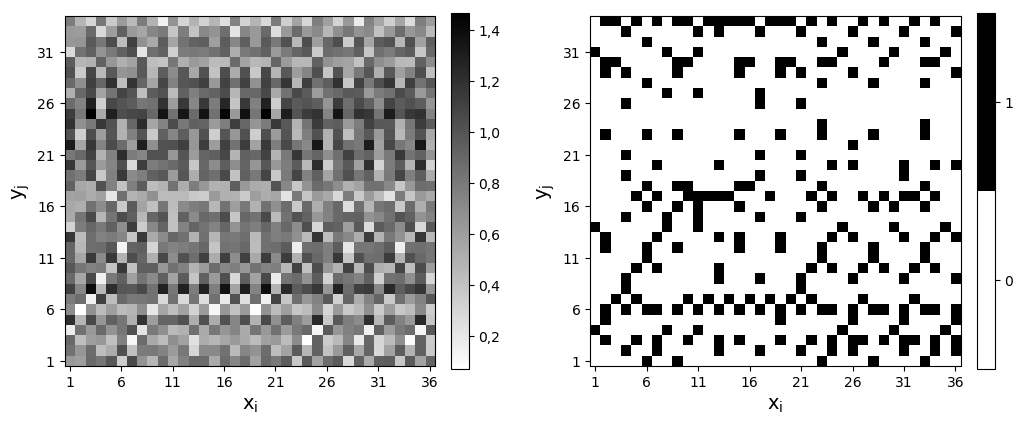

In [6]:
# Creating and plotting distance matrix and cross recurrence plot using Euclidean distance
dimension, delay1, delay2, threshold, norm = 3, 2, 3, 0.5, "euclidean"
distance_matrix = crp.distance_matrix(data1, data2, dimension, delay1, delay2, norm)
cross_matrix = crp.cross_matrix(data1, data2, dimension, delay1, delay2, threshold, norm)
distance_matrix = np.transpose(distance_matrix)
cross_matrix = np.transpose(cross_matrix)
LIN = len(distance_matrix[:,0])
COL = len(distance_matrix[0])

plt.figure(num=None, figsize=((12,6)), dpi= 100)
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1,2,1)
plt.imshow(distance_matrix, cmap = 'binary')
plt.axis([-0.5, COL-0.5, -0.5, LIN-0.5])
plt.xlabel(r'$\mathrm{x_{i}}$', fontsize=14)
plt.ylabel(r'$\mathrm{y_{j}}$', fontsize=14)
plt.xticks([x for x in range(0, COL, 5)], [x+1 for x in range(0, COL, 5)])
plt.yticks([x for x in range(0, LIN, 5)], [x+1 for x in range(0, LIN, 5)])
plt.colorbar(fraction=0.044, pad=0.04)
plt.subplot(1,2,2)
cmap = plt.get_cmap('binary', 2)
plt.imshow(cross_matrix, cmap = cmap, vmin = 0, vmax = 1)
plt.axis([-0.5, COL-0.5, -0.5, LIN-0.5])
plt.xlabel(r'$\mathrm{x_{i}}$', fontsize=14)
plt.ylabel(r'$\mathrm{y_{j}}$', fontsize=14)
plt.xticks([x for x in range(0, COL, 5)], [x+1 for x in range(0, COL, 5)])
plt.yticks([x for x in range(0, LIN, 5)], [x+1 for x in range(0, LIN, 5)])
cbar = plt.colorbar(fraction=0.044, pad=0.04, ticks=[0.25,0.75])
cbar.ax.set_yticklabels(['0', '1'])
plt.show()

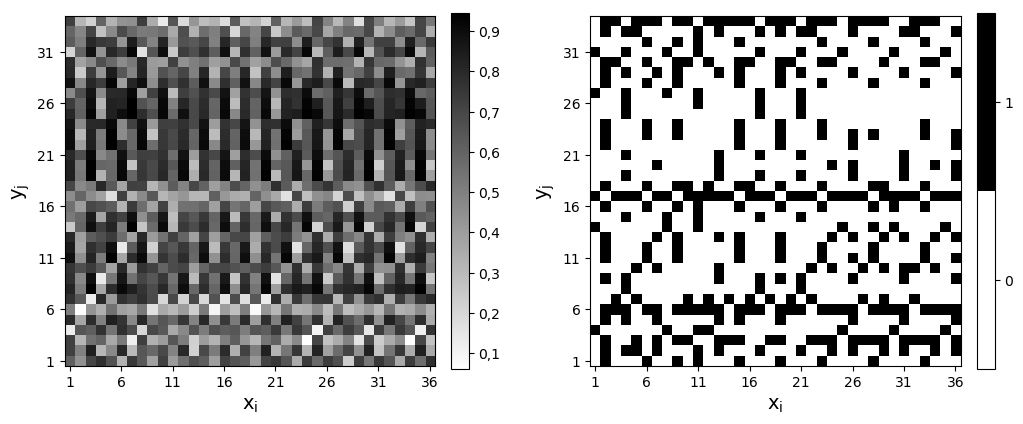

In [7]:
# Creating and plotting distance matrix and cross recurrence plot using Supremum distance
dimension, delay1, delay2, threshold, norm = 3, 2, 3, 0.5, "supremum"
distance_matrix = crp.distance_matrix(data1, data2, dimension, delay1, delay2, norm)
cross_matrix = crp.cross_matrix(data1, data2, dimension, delay1, delay2, threshold, norm)
distance_matrix = np.transpose(distance_matrix)
cross_matrix = np.transpose(cross_matrix)
LIN = len(distance_matrix[:,0])
COL = len(distance_matrix[0])

plt.figure(num=None, figsize=((12,6)), dpi= 100)
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1,2,1)
plt.imshow(distance_matrix, cmap = 'binary')
plt.axis([-0.5, COL-0.5, -0.5, LIN-0.5])
plt.xlabel(r'$\mathrm{x_{i}}$', fontsize=14)
plt.ylabel(r'$\mathrm{y_{j}}$', fontsize=14)
plt.xticks([x for x in range(0, COL, 5)], [x+1 for x in range(0, COL, 5)])
plt.yticks([x for x in range(0, LIN, 5)], [x+1 for x in range(0, LIN, 5)])
plt.colorbar(fraction=0.044, pad=0.04)
plt.subplot(1,2,2)
cmap = plt.get_cmap('binary', 2)
plt.imshow(cross_matrix, cmap = cmap, vmin = 0, vmax = 1)
plt.axis([-0.5, COL-0.5, -0.5, LIN-0.5])
plt.xlabel(r'$\mathrm{x_{i}}$', fontsize=14)
plt.ylabel(r'$\mathrm{y_{j}}$', fontsize=14)
plt.xticks([x for x in range(0, COL, 5)], [x+1 for x in range(0, COL, 5)])
plt.yticks([x for x in range(0, LIN, 5)], [x+1 for x in range(0, LIN, 5)])
cbar = plt.colorbar(fraction=0.044, pad=0.04, ticks=[0.25,0.75])
cbar.ax.set_yticklabels(['0', '1'])
plt.show()

## 1.2 References

[1] Takens F., Detecting strange attractors in turbulence, In: Rand D., Young LS. (eds) Dynamical Systems and Turbulence, Warwick 1980. Lecture Notes in Mathematics, vol 898. Springer, Berlin, Heidelberg (1981). DOI: [10.1007/BFb0091924](https://doi.org/10.1007/BFb0091924)

[2] M. B. Kennel, R. Brown, H. D. I. Abarbanel, Determining embedding dimension for phase-space reconstruction using a geometrical construction, Physical Review A, 45(6), 3403-3411p (1992). DOI: [10.1103/PhysRevA.45.3403](https://doi.org/10.1103/PhysRevA.45.3403)

[3] L. Cao, Practical method for determining the minimum embedding dimension of a scalar time series, Physica D: Nonlinear Phenomena, 110(12), 43-50p (1997). DOI: [10.1016/S0167-2789(97)00118-8](https://doi.org/10.1016/S0167-2789(97)00118-8)

[4] A. Fraser, H. Swinney, Independent coordinates for strange attractors from mutual information, Physical Review A, 33(2), 1134-1140p (1986). DOI: [10.1103/PhysRevA.33.1134](https://doi.org/10.1103/PhysRevA.33.1134)

[5] Marwan, N., Thiel, M., Nowaczyk, N. R., Cross recurrence plot based synchronization of time series, Nonlinear Processes in Geophysics, 9, 325-331p (2002). DOI: [10.5194/npg-9-325-2002](https://doi.org/10.5194/npg-9-325-2002) 
